# Linear Regression

## Assumptions

Correlation analyses checks for a linear coherence between to or more variables. Linear regression calculates the mathematical function for a response variable influenced by one or several predicting variables. 

The simplified linear model contains $\alpha$ as y-axis intercept, $\beta$ standing for the slope and $\varepsilon$ for the experimental error (i is the measured value number i):

$$y_{i} = \alpha + \beta x_{i} + \varepsilon_{i}$$

The following assumptions are prerequisites for a linear regression:

   * The **number of predicting values (x-values)** must be at least two (preferably more!)
   
   * The **number of repetitions over the entire experiment** must be at least three.
   
   * **Homogeneity of variances of the residuals**: Residuals shall be scattering equally around the zero line in a residual plot. The range should not get smaller in the middle nor on the endings. Homogeneity of variances is assumed.
   
   * **Normal distribution of residuals:** The residual plot should ideally look like a "sky full of stars" scattering around the horizontal zero line. A boxplot or QQ-Plot might also be helpful for obtaining a normal distribution but this will not offer the possibility to check for homogeneity of variances (because it is only one box present). 

## Implementation

There are many packages and functions that perform linear regression in python. 

Sklearn is one of the most popular machine learning libraries, and it also performs linear regression. It's not a statistics library! But if you only need "a fitted line", then sklearn is great.

    sklearn.linear_model.LinearRegression().fit(x,y)
    
Typically, you'll first create an empty <tt>sklearn.linear_model.LinearRegression()</tt> object, and then apply <tt>fit(x,y)</tt> with your data to that object. This will return a <tt>linear_regressor</tt> with attributes <tt>intercept_</tt>, <tt>coef_</tt> and a method <tt>predict(x)</tt> to compute predicted values to x.

<tt>x</tt> and <tt>y</tt> will need to be reshaped as shown for the example of <tt>x</tt>:

    x = pd.iloc[:, 0].values.reshape(-1, 1) # for values in the first column with index 0
    
If you need p-values for intercept and slope, etc., there are alternatives. For example, <tt>statsmodels.api.OLS()</tt>. You find example code further below.

Worth noticing is <tt>seaborn</tt>. It creates beautiful plots, e.g. of a regression model with confidence bands (code also further below).

## Example: Sugar Beets

### Experiment

An experiment was designed to find out whether and how irrigation influences the yield of sugar beets. Seven different amounts of water (from 0 up to 250 mm) applied on four plots respectively. The real amount of water varies slightly and the data shown below considers only real values (Collins and Seeney, 1999, p. 207f). One column contains the irrigation, the other column contains the sugar beet yield.

In [25]:
import pandas as pd
beets = pd.read_csv('data/beets.csv', sep='\t')
beets

,water,yield
0,0,9.0
1,0,10.3
2,0,11.5
3,0,14.2
4,48,12.2
5,50,13.8
6,48,14.0
7,50,16.2
8,88,14.0
9,88,14.5


### Statistical Analysis

#### ... with Sklearn

If we use Sklearn, we usually do not care much about statistics, it's simply about fitting the line.

Intercept of linear model:
[12.25553062]
Slope of linear model:
[[0.02688113]]


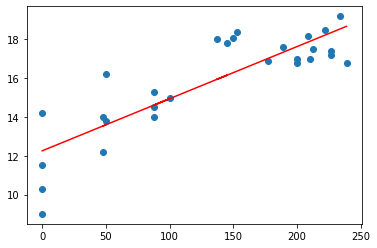

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = beets.iloc[:, 0].values.reshape(-1, 1) # water
Y = beets.iloc[:, 1].values.reshape(-1, 1) # yield

linear_regressor = LinearRegression()  # create object
linear_regressor.fit(X, Y)  # perform linear regression
print("Intercept of linear model:")
print(linear_regressor.intercept_)
print("Slope of linear model:")
print(linear_regressor.coef_)

# visualize model
plt.scatter(X, Y)
Y_pred = linear_regressor.predict(X)
plt.plot(X, Y_pred, color='red')

#### ... with statsmodels.api

If we use statsmodels.api we usually care about statistics and about whether our model is a 'good' model. We analyse residuals an p-values carefully.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     67.97
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.00e-08
Time:                        15:36:16   Log-Likelihood:                -48.249
No. Observations:                  28   AIC:                             100.5
Df Residuals:                      26   BIC:                             103.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2555      0.505     24.245      0.0

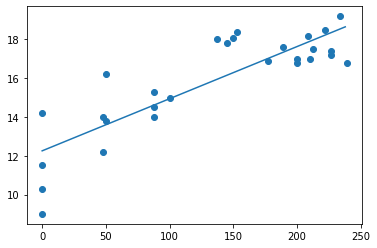

In [27]:
import statsmodels.api as sm
import numpy as np

# get p-values & other information with statsmodels:
X2 = sm.add_constant(X) # that's the intercept
linreg = sm.OLS(Y, X2)
model = linreg.fit()
print(model.summary())

# visualize
# generate x-values for your regression line
x = np.arange(min(X), max(X))

p = model.params
print("Intercept & slope of model:")
print(p)
plt.scatter(X, Y)
plt.plot(x, p[0] + p[1] * x)

The following plots are created for the graphical analysis of residuals:

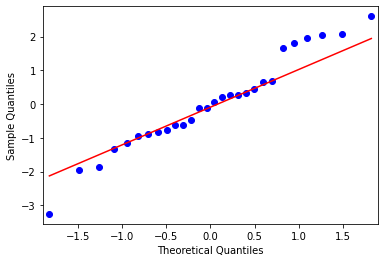

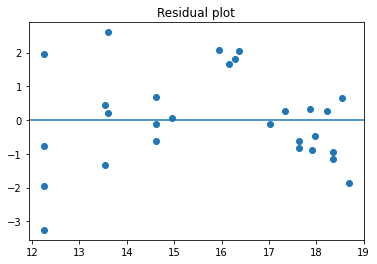

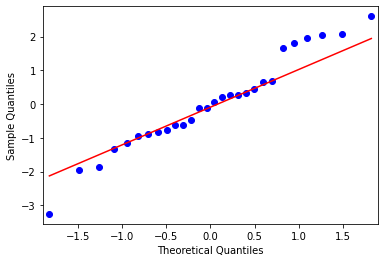

In [28]:
pred_val = model.fittedvalues.copy()
true_val = beets['yield'].values.copy()
residual = true_val - pred_val
plt.scatter(pred_val, residual)
plt.title("Residual plot")
plt.axhline()

import statsmodels.graphics

statsmodels.graphics.gofplots.qqplot(residual, line = 'q')

Producing a seaborn plot of the data:

<AxesSubplot:xlabel='water', ylabel='yield'>

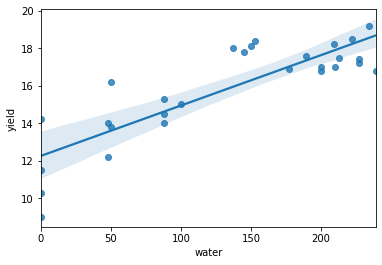

In [29]:
import seaborn as sns
sns.regplot(x = 'water', y = 'yield', data = beets)

   * The number of **predicting values** is 7 > 2.
    
   * The **number of repetitions** counts four for each predicting value (this is greater than three values for the complete regression). 
   
   * **Homogeneity of variances** for the residuals is accepted from residual plot
   
   * An approximate **normal distribution** of the residuals is given in QQ-plot
   
$\Longrightarrow$ Linear Regression model is ok.

### Interpretation

The line is:

$$y = 12.25553062 + 0.02688113x$$

Both intercept and slope have a tiny p-value (output of OLS) and are thus significantly different from 0.

The adjusted $R^{2}$ might be interpreted as *reduction of variance in percentage*, here it's 0.713.

## Example: Bread Wheat

### Experiment

An experiment was designed to investigate the influence of different amounts of fertilizer on the yield of bread wheat.  Concentrations of 100, 200, 300, 400, 500, 600 and 700 lb fertilizer/acre were applied on five randomly chosen plots respectively (data shown below, Wonnacott and Wonnacott, 1990, p 359, data was read from figure 11-1).

In [30]:
wheat = pd.read_csv('data/wheat.csv', sep='\t')
wheat

,fertilizer,yield
0,100,24
1,100,35
2,100,42
3,100,47
4,100,55
5,200,31
6,200,40
7,200,50
8,200,54
9,200,61


### Statistical Analysis

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     61.85
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           4.57e-09
Time:                        15:37:24   Log-Likelihood:                -129.62
No. Observations:                  35   AIC:                             263.2
Df Residuals:                      33   BIC:                             266.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0000      3.822      8.634      0.0

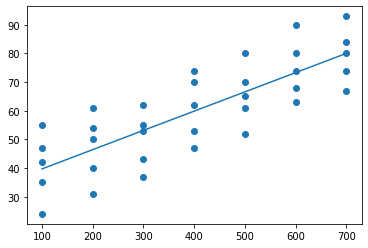

In [31]:
X = wheat.iloc[:, 0].values.reshape(-1, 1) # fertilizer
Y = wheat.iloc[:, 1].values.reshape(-1, 1) # wheat

# get p-values & other information with statsmodels:
X2 = sm.add_constant(X) # that's the intercept
linreg = sm.OLS(Y, X2)
model = linreg.fit()
print(model.summary())

# visualize
# generate x-values for your regression line
x = np.arange(min(X), max(X))

p = model.params
print("Intercept & slope of model:")
print(p)
plt.scatter(X, Y)
plt.plot(x, p[0] + p[1] * x)

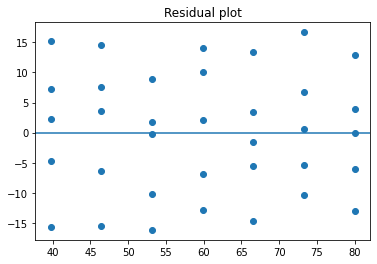

In [33]:
pred_val = model.fittedvalues.copy()
true_val = wheat['yield'].values.copy()
residual = true_val - pred_val
plt.scatter(pred_val, residual)
plt.title("Residual plot")
plt.axhline()

   * The number of **predicting values** is seven (> 2).
   
   * **Five repetitions** for each x-value fulfill the requirement of at least three repetitions over all predictors. 

   * **Homogeneity of variances** is assumed (see residual plot)
 
   * The residuals are approximately **normal distributed** (see residual plot)
   
$\Longrightarrow$ model is fitting well for the regression analysis of bread wheat data. 

The linear regression model is

$$y = 33 + 0.0672x$$

Both intercept and slope are statistically signifcant.


<font size="3"><div class="alert alert-warning"><b>Exercise 10.1:</b> <br> 
Sulphur is efficiently used fighting potato scab. Researchers investigated the effect of different sulphur concentrations on the plant disease. Four concentrations (0, 300, 600 and 1200 pounds/acre) have been applied on four plots respectively. The sum of surface damage by scab has been counted for 100 randomly chosen potatoes from each plot (data shown below) (Cochran and Cox, 1950, cited according to Pearce, 1983, p. 46).

Are the given data fitting for a regression analysis with the linear model? Are the residuals normal distributed?

If so, which are intercept and slope? Is the regression significant with an error probability of 5%? 

Plot confidence bands!
</div>
</font>

In [34]:
sul = pd.read_csv('data/sulphur.csv', sep='\t')
sul

,concentration,scab
0,0,18
1,0,30
2,0,24
3,0,29
4,300,9
5,300,9
6,300,16
7,300,4
8,600,18
9,600,10


<font size="3">
<b>Try it yourself:</b></font>

**Example Solution:**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     13.70
Date:                Wed, 17 Mar 2021   Prob (F-statistic):            0.00237
Time:                        15:47:14   Log-Likelihood:                -51.087
No. Observations:                  16   AIC:                             106.2
Df Residuals:                      14   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9000      2.440      8.564      0.0

/home/katharina/PythonStatistics/PythonStatistics/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


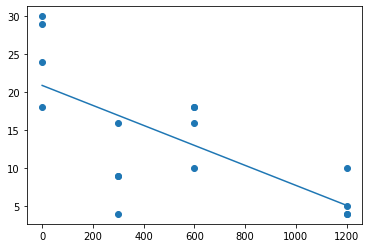

In [36]:
X = sul.iloc[:, 0].values.reshape(-1, 1) # concentration
Y = sul.iloc[:, 1].values.reshape(-1, 1) # scab

# get p-values & other information with statsmodels:
X2 = sm.add_constant(X) # that's the intercept
linreg = sm.OLS(Y, X2)
model = linreg.fit()
print(model.summary())

# visualize
# generate x-values for your regression line
x = np.arange(min(X), max(X))

p = model.params
print("Intercept & slope of model:")
print(p)
plt.scatter(X, Y)
plt.plot(x, p[0] + p[1] * x)

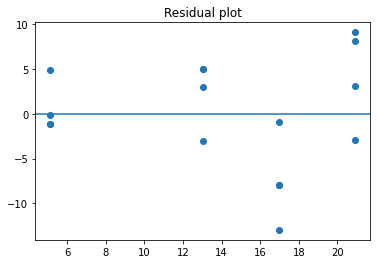

In [37]:
pred_val = model.fittedvalues.copy()
true_val = sul['scab'].values.copy()
residual = true_val - pred_val
plt.scatter(pred_val, residual)
plt.title("Residual plot")
plt.axhline()

<AxesSubplot:xlabel='concentration', ylabel='scab'>

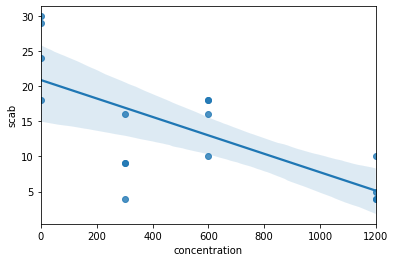

In [38]:
sns.regplot(x = 'concentration', y = 'scab', data = sul)

The model is

$$y = 2.09000000e+01 -1.31428571e-02 x$$

   * **Number of predictor levels** is greater than two.
   
   * **Number of observations** over all x-values is greater than three.
   
   * **Homogeneity of variances** of residuals can be doubted, but robustness is assumed
   
   * **Normal distribution** of residuals can be doubted, but robustness is assumed
   
Both slope and intercapt are significant.

Further reading:
    
   * <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>
    
   * <https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html>
    
   * <https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html>
    
   * <https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html>
    
   * <https://seaborn.pydata.org/generated/seaborn.regplot.html>